<a href="https://colab.research.google.com/github/MonkeyWrenchGang/MGTPython/blob/main/module_3/3_2_accuracy_precision_recall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 


---

Machine learning (ML) classification models are often evaluated using three key metrics: accuracy, precision, and recall. 

- Accuracy is a measure of how often the model correctly predicts the class of an example. 
- Precision is a measure of how many of the model's positive predictions are actually correct. 
- Recall is a measure of how many of the actual positive examples the model is able to identify. 

Together, these metrics provide a picture of a model's predictive performance and can be used to compare different models and to determine the best one for a given task.

In this tutorial we are going to do a little evaluation and exploration. 


In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# ABNB Fraudulent Property Identification 

Airbnb is a platform that allows individuals to rent out their properties to travelers. However, there have been instances of fraud on the platform, where individuals create fake listings or scam renters out of money. To combat this problem, Airbnb has implemented a number of measures to detect and prevent fraud, such as using machine learning algorithms to analyze user behavior and flag suspicious activity. Additionally, the company has a dedicated Trust and Safety team that reviews flagged accounts and takes appropriate action. Despite these efforts, fraud on Airbnb can still occur, so it is important for renters to exercise caution when booking a property and to report any suspicious activity to Airbnb.

The data science team has done the following:  

1. Gathered historic property and reservation data and over the past year 
2. Identified if the property was fraudulent or not (see variable **"fraud_label"**) 0=not fraud, 1=fraud
3. Trained a classification machine learning model to pedict if the property was fraudulent creating two other variables. **"prediction_decision"** is 0 if not fraud and 1 if predicted fraud, and a **prediction_score** that is the probabliy of a property being fraudlent. 

Your challenge is to:

1. analyze the data 
2. answer a few questions 
3. assess the model's performance using Accuracy, Precision, Recall. 



Let's import the data!


In [ ]:
abnb = pd.read_csv("https://raw.githubusercontent.com/MonkeyWrenchGang/MGTPython/main/module_3/data/abnb_fraud_reservations.csv")
abnb.head()

,price_per_night,number_of_guests_max,number_of_bedrooms,number_of_baths,number_of_beds,ip_address,email_domain,property_type,property_space,min_night_stay,guest_space,amenity_ac,amenity_tv,amenity_fire_place,amenity_private_entrance,amenity_wifi,guest_space_parking,guest_space_gym,guest_space_pool,guest_space_hot_tub,property_city,event_timestamp,fraud_label,prediction_decision,prediction_score
0,335.0,12.0,6.0,2.0,4.0,57.162.17.6,yahoo.com,tiny house,shared room,1,no,yes,no,no,no,yes,yes,yes,no,no,Orlando,2020-06-18 10:09:36,0,0,0.008578
1,324.0,10.0,4.0,2.0,5.0,192.8.199.251,yahoo.com,tiny house,shared room,1,yes,yes,no,yes,no,no,no,no,yes,no,Ft. Lauderdale,2021-02-20 11:30:15,0,0,0.008908
2,262.0,8.0,4.0,3.0,8.0,64.60.134.106,yahoo.com,chalet,shared room,15,no,no,no,yes,no,no,yes,no,yes,no,Orlando,2021-01-30 04:52:16,0,0,0.009864
3,340.0,11.0,7.0,3.0,6.0,157.180.74.231,hotmail.com,villa,shared room,1,yes,no,no,no,yes,no,yes,no,no,no,Miami,2020-06-21 23:38:16,0,0,0.008908
4,288.0,6.0,4.0,3.0,5.0,171.139.240.24,yahoo.com,villa,shared room,1,yes,no,yes,yes,no,yes,yes,no,yes,yes,Ft. Lauderdale,2020-06-12 20:07:55,1,1,0.981982


# Understand the Target Variable


---

Understanding the target of a machine learning model is an important step in building an effective model. The target, also known as the **output or label**, is the value that the model is trying to predict. In supervised learning, the target is usually a categorical(classification) or numerical value(regression/estimation) that is provided in the training data. 

For example, in a spam detection model, the target would be whether an email is spam or not. In an image classification model, the target would be the class of the image such as dog or cat. Understanding the target allows the data scientist to select the appropriate algorithm and evaluation metrics for the problem. It also helps to identify any potential issues with the data such as class imbalance which might affect the performance of the model. Toget started we'll take a look at the following:

1. Frequency count of fraud_label
2. Normalized frequency of fraud_label
3. Frequency of prediction_decision 
4. Mean prediction_score

In [ ]:
abnb["fraud_label"].value_counts()

0    44797
1     5203
Name: fraud_label, dtype: int64

In [ ]:
abnb["fraud_label"].value_counts(normalize=True)

0    0.89594
1    0.10406
Name: fraud_label, dtype: float64

## prediction_decision

A prediction decision is a final output made by a machine learning model that assigns a class or label to an input. It is based on the predicted probability of the model, and is usually made by applying a threshold or cutoff to the predicted probabilities. The threshold or cutoff is typically set to a value such as 0.5, so that any probability above the threshold is classified as one class, and any probability below the threshold is classified as the other class.



In [ ]:
abnb["prediction_decision"].value_counts()

0    45567
1     4433
Name: prediction_decision, dtype: int64

In [ ]:
abnb["prediction_decision"].value_counts(normalize=True)

0    0.91134
1    0.08866
Name: prediction_decision, dtype: float64

## prediction_score 

The prediction_score is the predicted probability of fraud. It refers to the likelihood or confidence that a machine learning model assigns to a particular outcome or class. In other words, it is a value between 0 and 1 that represents the model's prediction of the probability that an input belongs to a certain class - in our case Fraud(1) / Not Fraud(0). 

For example, in this case our classification problem, a predicted probability of 0.7 for Fraud class means that the model is 70% confident that the input is a Fraud example.


In [ ]:
abnb.groupby("fraud_label")["prediction_score"].mean()

fraud_label
0    0.024137
1    0.778427
Name: prediction_score, dtype: float64

## Eyeballing DataFrame


---

"Eyeballing" a DataFrame refers to quickly reviewing the contents, structure and columns of a DataFrame. You can use the following

1. df.info()
2. df.describe()
3. df.shape


In [ ]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price_per_night           50000 non-null  float64
 1   number_of_guests_max      50000 non-null  float64
 2   number_of_bedrooms        50000 non-null  float64
 3   number_of_baths           50000 non-null  float64
 4   number_of_beds            50000 non-null  float64
 5   ip_address                50000 non-null  object 
 6   email_domain              50000 non-null  object 
 7   property_type             50000 non-null  object 
 8   property_space            50000 non-null  object 
 9   min_night_stay            50000 non-null  int64  
 10  guest_space               50000 non-null  object 
 11  amenity_ac                50000 non-null  object 
 12  amenity_tv                50000 non-null  object 
 13  amenity_fire_place        50000 non-null  object 
 14  amenit

# Exploratory Analysis 

Exploratory data analysis (EDA) is an approach to analyzing and understanding a dataset. It is a process of summarizing and visualizing the main characteristics of a dataset, and identifying patterns, outliers, and relationships within the data. The goal of EDA is to provide a deeper understanding of the data, and to identify any potential issues or areas of interest that may need further investigation.

EDA typically includes the following steps:

1. Data preparation: This includes cleaning and preprocessing the data, such as handling missing values and converting data types.

2. Data summarization: This includes calculating summary statistics and generating visualizations, such as histograms and scatter plots, to get a sense of the distribution and relationship of the data.

3. Data visualization: This is one of the most important step in EDA, it helps to identify patterns and relationships in the data, and can also be used to identify outliers and anomalies.

4. Data transformation: This includes applying mathematical operations or other transformations to the data, such as taking the logarithm of a variable, in order to make patterns or relationships more apparent.



---

Let's start by answering a few questions: 

- What's the mean,min,max price per night BY property_city?
```python
# method 1
abnb.groupby("property_city")[["price_per_night"]].agg(['mean','min','max'])
# method 2 
abnb.groupby("property_city").agg({"price_per_night":['mean','min','max']})
```
- What's the average prediction_score and price per night by city?
```python
# method 1
abnb.groupby("property_city")[["price_per_night", "prediction_score"]].agg(['mean','min','max', 'count'])
# method 2
abnb.groupby("property_city").agg({
  "price_per_night":['mean','min','max', 'count'],
  "prediction_score":['mean','min','max', 'count']
})
```
- What's the mean prediction score and count by city and fraud_label?
```python
# method 1
abnb.groupby(["property_city", "fraud_label"])[[ "prediction_score"]].agg(['mean', 'count'])
# method 2
abnb.groupby(["property_city", "fraud_label"]).agg({
  "prediction_score":['mean', 'count']})

```

price_per_night              
                          mean    min    max
property_city                               
Ft. Lauderdale      323.489564   65.0  549.0
Jacksonville        340.129630  194.0  481.0
Miami               320.485001   93.0  491.0
Orlando             315.068465   45.0  526.0
Sarasota            335.498163   30.0  496.0
Tampa               325.707692  121.0  478.0

## whats the average prediction_score and price per night by city?

price_per_night                ... prediction_score            
                          mean    min    max  ...              min  max  count
property_city                                 ...                             
Ft. Lauderdale      323.489564   65.0  549.0  ...              0.0  1.0  10732
Jacksonville        340.129630  194.0  481.0  ...              0.0  1.0     54
Miami               320.485001   93.0  491.0  ...              0.0  1.0  13101
Orlando             315.068465   45.0  526.0  ...              0.0  1.0  23545
Sarasota            335.498163   30.0  496.0  ...              0.0  1.0   2178
Tampa               325.707692  121.0  478.0  ...              0.0  1.0    390

[6 rows x 8 columns]

## What's the mean  prediction score and count by city and fraud_label? 

In [ ]:
abnb.groupby(["property_city", "fraud_label"])[[ "prediction_score"]].agg(['mean', 'count'])

prediction_score       
                                       mean  count
property_city  fraud_label                        
Ft. Lauderdale 0                   0.021650   9596
               1                   0.774341   1136
Jacksonville   0                   0.015797     46
               1                   0.793980      8
Miami          0                   0.023080  11649
               1                   0.790956   1452
Orlando        0                   0.026549  21242
               1                   0.767575   2303
Sarasota       0                   0.018659   1955
               1                   0.823752    223
Tampa          0                   0.011275    309
               1                   0.793363     81

# Assess Model Performnace using Accuracy, Precision and Recall



---



1. Accuracy: Accuracy is a metric commonly used to evaluate the performance of a classification model. It is defined as the proportion of correctly classified instances to the total number of instances in the dataset. The formula for accuracy is:

  Accuracy = (Number of Correctly Classified Instances) / (Total Number of Instances)

  For example, if a model correctly classifies 90 out of 100 instances, then the accuracy of the model would be:

  Accuracy = (90) / (100) = 0.9 or 90%


2. Precision:
  Precision is a metric commonly used to evaluate the performance of a classification model, particularly when the goal is to minimize the number of false positives. It is defined as the proportion of true positive predictions to the total number of positive predictions made by the model. The formula for precision is:

  Precision = (True Positives) / (True Positives + False Positives)

  For example, if a model makes 100 positive predictions and 80 of them are correct, while 20 are incorrect, the precision would be:

  Precision = (80) / (80 + 20) = 0.8 or 80%

3. Recall:

  Recall is a metric commonly used to evaluate the performance of a classification model, particularly when the goal is to minimize the number of false negatives. It is defined as the proportion of true positive predictions to the total number of actual positive instances in the dataset. The formula for recall is:

  Recall = (True Positives) / (True Positives + False Negatives)

  For example, if there are 100 positive instances in the dataset and the model correctly identifies 80 of them, while missing 20, the recall would be:

  Recall = (80) / (80 + 20) = 0.8 or 80%

---

Start by identifying True Positives(TP), False Postives(FP), True Negatives and False Negatives



```python
# method 1
abnb.groupby(["fraud_label", "prediction_decision"])[["event_timestamp"]].count().rename(columns={"event_timestamp":"count"})
# method 2
abnb.groupby(["fraud_label", "prediction_decision"]).agg({
  "event_timestamp":["count"]})

TP = 4072
FP = 361
TN = 44436
FN = 1131

# -- TruePositives + TrueNegatives / (TruePositives + FalsePositives + TrueNegatives + FalseNegatives)
accuracy = (TP + TN)/(TP + FP + FN + TN)
print("the accuracy of the model is {:.4f}".format(accuracy))
```









In [ ]:
abnb.groupby(["fraud_label", "prediction_decision"])[["event_timestamp"]].count().rename(columns={"event_timestamp":"count"})

count
fraud_label prediction_decision       
0           0                    44436
            1                      361
1           0                     1131
            1                     4072

##  True Positive


---


True Positive is generally the "1", the minority case you are interested in. while a true negative the "0" is the default or majority case. 

## Accuracy 
What is the default accuracy of assigning everyone to not-fraud i.e. "0"? 

Defaut accuracy is simply the % of the majority case we can easily calcualte this using .value_counts():
```python
abnb["fraud_label"].value_counts(normalize=True)
```
in this case defalt accuracy is 89.59%

In [ ]:
abnb["fraud_label"].value_counts(normalize=True)

0    0.89594
1    0.10406
Name: fraud_label, dtype: float64

In [3]:
TP = 4072
FP = 361
TN = 44436
FN = 1131

# -- TruePositives + TrueNegatives / (TruePositives + FalsePositives + TrueNegatives + FalseNegatives)
accuracy = (TP + TN)/(TP + FP + FN + TN)
print("Model Accuracy is: {:.2f}%".format(accuracy*100))

Model Accuracy is: 97.02%


## Precision
Precision = TruePositives / (TruePositives + FalsePositives)

```python
precision = (TP)/(TP + FP )

print("Model Precision is: {:.2f}%".format(precision*100))
```

In [4]:
# -- TruePositives / (TruePositives + FalsePositives)
precision = (TP)/(TP + FP )
print("Model Precision is: {:.2f}%".format(precision*100))

Model Precision is: 91.86%


## Recall 


---
Recall = TruePositives / (TruePositives + FalseNegatives)
```python
# -- TruePositives / (TruePositives + FalseNegatives)
recall = TP/(TP + FN)
print("Model Recall is: {:.2f}%".format(recall*100))
```

Model Recall is: 78.26%


## Double check your manual calculations with scikit-learn 


---

Scikit-learn (also known as sklearn) is an open-source Python library that provides a wide range of tools for machine learning and statistical modeling. It is built on top of other popular Python libraries such as NumPy and pandas and is designed to be easy to use and integrate with other machine learning libraries and frameworks.

The library provides several metrics and evaluation functions such as accuracy, precision, recall, F1-score, ROC, AUC, etc. Scikit-learn is the most popular package for machine learning projects.

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("accuracy : {:.4f}".format( accuracy_score(abnb["fraud_label"], abnb['prediction_decision'])))
print("precision: {:.4f}".format( precision_score(abnb["fraud_label"], abnb['prediction_decision'])))
print("recall.  : {:.4f}".format( recall_score(abnb["fraud_label"], abnb['prediction_decision'])))
```


## Example of pretty charts. 


---


```python
print("Confusing  Matrix")
confusion_matrix = pd.crosstab(abnb['fraud_label'], abnb['prediction_decision'],  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_pct = pd.crosstab(abnb['fraud_label'], abnb['prediction_decision'],  normalize="all", rownames=['Actual'], colnames=['Predicted']).round(3)
print (confusion_matrix)
print("\n")

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Counts ')

plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_pct, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - PCTs ')
plt.show()
```

A confusion matrix is a table that is used to define the performance of a classification model. It is used to describe the performance of a classification model by summarizing the model's predicted and actual results into four outcomes: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

Here is an example of a binary classification problem:

|               |  Predicted Positive  | Predicted Negative  |
|----------------|----------------------|---------------------|
| Actual Positive|         TP           |         FN          |
| Actual Negative|         FP           |         TN          |


- True Positives (TP) are the cases where the model predicted the positive class and it was correct.
- True Negatives (TN) are the cases where the model predicted the negative class and it was correct.
- False Positives (FP) are the cases where the model predicted the positive class but it was incorrect.
- False Negatives (FN) are the cases where the model predicted the negative class but it was incorrect.

A confusion matrix can be used to calculate various evaluation metrics such as accuracy, precision, recall, F1-score, ROC, AUC, etc. These metrics can provide a more comprehensive understanding of a model's performance and can be used to compare different models or to tune a model's parameters.

Confusing  Matrix
Predicted      0     1
Actual                
0          44436   361
1           1131  4072




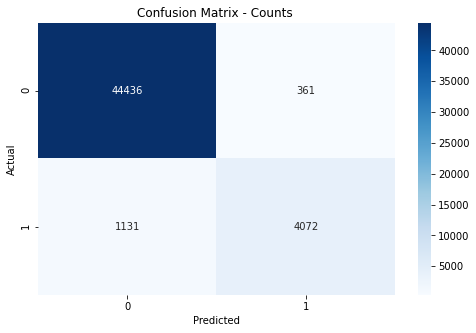

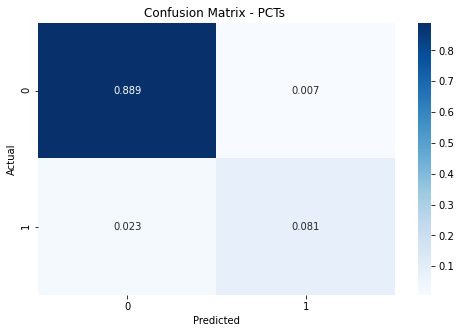

In [ ]:
print("Confusing  Matrix")
confusion_matrix = pd.crosstab(abnb['fraud_label'], abnb['prediction_decision'],  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_pct = pd.crosstab(abnb['fraud_label'], abnb['prediction_decision'],  normalize="all", rownames=['Actual'], colnames=['Predicted']).round(3)
print (confusion_matrix)
print("\n")

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - Counts ')

plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix_pct, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix - PCTs ')
plt.show()

## Suppose we change the Score Threshold?


---


Suppose we change the Score Threshold, it will affect the number of True Positives, True Negatives, False Positives, and False Negatives.

A threshold is a value that separates the positive class from the negative class. For example, a threshold of 0.5 for a binary classification problem means that any predicted probability greater than 0.5 will be classified as the positive class and any predicted probability less than 0.5 will be classified as the negative class.

By changing the threshold, we change the criteria for classifying a sample as positive or negative. This will affect the number of true positives, true negatives, false positives, and false negatives.

If we lower the threshold, we will get more true positives, but also more false positives (because more samples will be classified as positive). This will increase the recall (the number of true positives over the number of true positives plus the number of false negatives) but decrease the precision (the number of true positives over the number of true positives plus the number of false positives).

On the other hand, if we raise the threshold, we will get fewer true positives, but also fewer false positives. This will decrease the recall but increase the precision.

- let's decrease the threshold to 0.3 and see what happens to accuracy, precision and recall. 

```python
# -- change threshold 
abnb["new_label"] = 0
abnb.loc[(abnb["prediction_score"] > 0.3), "new_label"] = 1
# -- metrics 
print("accuracy : {0}".format( accuracy_score(abnb["fraud_label"], abnb['new_label'])))
print("precision: {0}".format( precision_score(abnb["fraud_label"], abnb['new_label'])))
print("recall.  : {0}".format( recall_score(abnb["fraud_label"], abnb['new_label'])))
```

- let's increase the threshold to 0.7 and see what happens to accuracy, precision and recall. 

```python
# -- change threshold 
abnb["new_label"] = 0
abnb.loc[(abnb["prediction_score"] > 0.7), "new_label"] = 1
# -- metrics 
print("accuracy : {0}".format( accuracy_score(abnb["fraud_label"], abnb['new_label'])))
print("precision: {0}".format( precision_score(abnb["fraud_label"], abnb['new_label'])))
print("recall.  : {0}".format( recall_score(abnb["fraud_label"], abnb['new_label'])))
```


In [ ]:
abnb["new_label"] = 0
abnb.loc[(abnb["prediction_score"] > 0.3), "new_label"] = 1
abnb.head()

,price_per_night,number_of_guests_max,number_of_bedrooms,number_of_baths,number_of_beds,ip_address,email_domain,property_type,property_space,min_night_stay,guest_space,amenity_ac,amenity_tv,amenity_fire_place,amenity_private_entrance,amenity_wifi,guest_space_parking,guest_space_gym,guest_space_pool,guest_space_hot_tub,property_city,event_timestamp,fraud_label,prediction_decision,prediction_score,new_label
0,335.0,12.0,6.0,2.0,4.0,57.162.17.6,yahoo.com,tiny house,shared room,1,no,yes,no,no,no,yes,yes,yes,no,no,Orlando,2020-06-18 10:09:36,0,0,0.008578,0
1,324.0,10.0,4.0,2.0,5.0,192.8.199.251,yahoo.com,tiny house,shared room,1,yes,yes,no,yes,no,no,no,no,yes,no,Ft. Lauderdale,2021-02-20 11:30:15,0,0,0.008908,0
2,262.0,8.0,4.0,3.0,8.0,64.60.134.106,yahoo.com,chalet,shared room,15,no,no,no,yes,no,no,yes,no,yes,no,Orlando,2021-01-30 04:52:16,0,0,0.009864,0
3,340.0,11.0,7.0,3.0,6.0,157.180.74.231,hotmail.com,villa,shared room,1,yes,no,no,no,yes,no,yes,no,no,no,Miami,2020-06-21 23:38:16,0,0,0.008908,0
4,288.0,6.0,4.0,3.0,5.0,171.139.240.24,yahoo.com,villa,shared room,1,yes,no,yes,yes,no,yes,yes,no,yes,yes,Ft. Lauderdale,2020-06-12 20:07:55,1,1,0.981982,1


In [ ]:
print("accuracy : {0}".format( accuracy_score(abnb["fraud_label"], abnb['new_label'])))
print("precision: {0}".format( precision_score(abnb["fraud_label"], abnb['new_label'])))
print("recall.  : {0}".format( recall_score(abnb["fraud_label"], abnb['new_label'])))

accuracy : 0.9662
precision: 0.8240177089097952
recall.  : 0.8585431481837401
